## Search algorithms based on following heuristics:

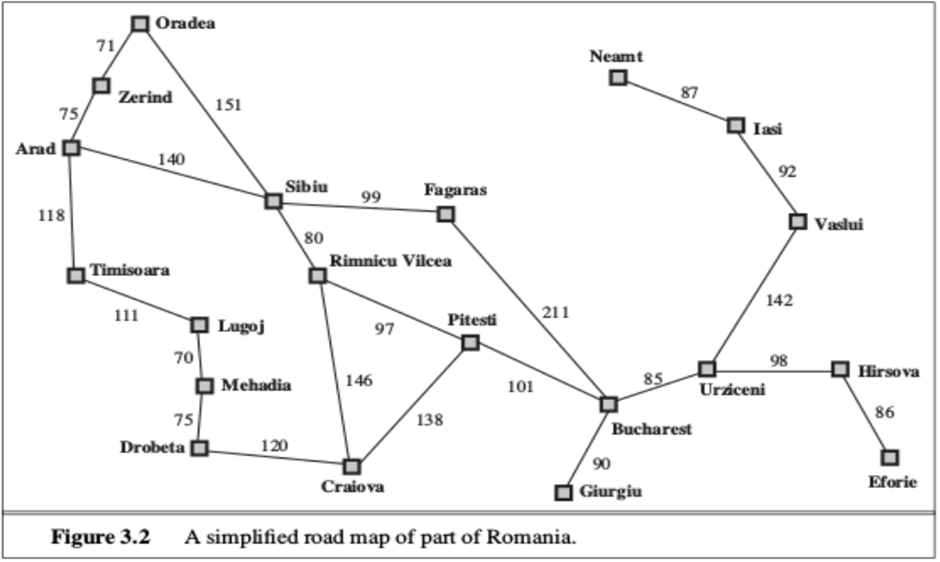  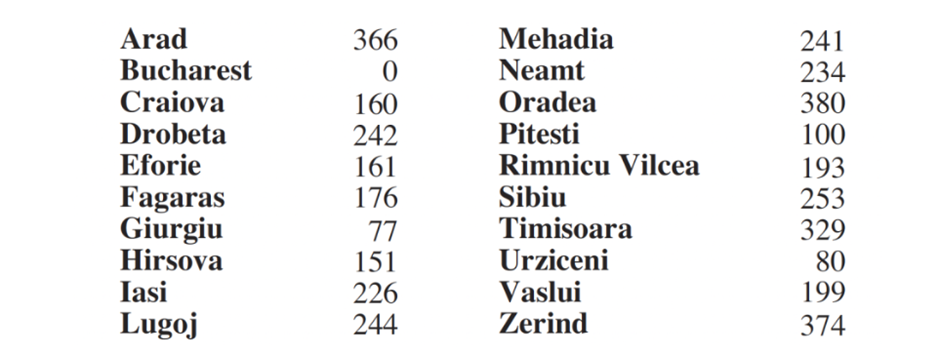

In [1]:
dict_gn=dict(
            Arad=dict(Zerind=75,Timisoara=118,Sibiu=140),
            Bucharest=dict(Urziceni=85,Giurgiu=90,Pitesti=101,Fagaras=211),
            Craiova=dict(Drobeta=120,Pitesti=138,Rimnicu=146),
            Drobeta=dict(Mehadia=75,Craiova=120),
            Eforie=dict(Hirsova=86),
            Fagaras=dict(Sibiu=99,Bucharest=211),
            Giurgiu=dict(Bucharest=90),
            Hirsova=dict(Eforie=86,Urziceni=98),
            Iasi=dict(Neamt=87,Vaslui=92),
            Lugoj=dict(Mehadia=70,Timisoara=111),
            Mehadia=dict(Lugoj=70,Drobeta=75),
            Neamt=dict(Iasi=87),
            Oradea=dict(Zerind=71,Sibiu=151),
            Pitesti=dict(Rimnicu=97,Bucharest=101,Craiova=138),
            Rimnicu=dict(Sibiu=80,Pitesti=97,Craiova=146),
            Sibiu=dict(Rimnicu=80,Fagaras=99,Arad=140,Oradea=151),
            Timisoara=dict(Lugoj=111,Arad=118),
            Urziceni=dict(Bucharest=85,Hirsova=98,Vaslui=142),
            Vaslui=dict(Iasi=92,Urziceni=142),
            Zerind=dict(Oradea=71,Arad=75)
            )

dict_hn={
         'Arad':336,'Bucharest':0,'Craiova':160,'Drobeta':242,'Eforie':161,
         'Fagaras':176,'Giurgiu':77,'Hirsova':151,'Iasi':226,'Lugoj':244,
         'Mehadia':241,'Neamt':234,'Oradea':380,'Pitesti':100,'Rimnicu':193,
         'Sibiu':253,'Timisoara':329,'Urziceni':80,'Vaslui':199,'Zerind':374
         }

# Breadth first search

In [2]:
# This section implements a Breadth First Search (BFS) algorithm to find a path from city `start` to city `goal`.
# The function `BFS` takes three inputs: city, city_from_q and visited_city
# `city` is the current city in the search
# `city_from_q` is the queue of cities from which the current city was reached
# `visited_city` is the queue of cities that have been visited
import queue as Q
start='Arad'
goal='Bucharest'
result=''


def BFS(city, city_from_q, visited_city):
    global result
    # If the current city is the start city, add it to the result
    if city==start:
        result=result+' '+city
    
    # Iterate over the neighboring cities of the current city
    for BFS_city in dict_gn[city].keys():
        # If the neighbor city is the goal city, add it to the result and return
        if BFS_city==goal:
            result=result+' '+BFS_city
            return
        
        # If the neighbor city has not been visited or is not in the city_from_q,
        # add it to the city_from_q and add it to the result
        if BFS_city not in city_from_q.queue and BFS_city not in visited_city.queue:
            city_from_q.put(BFS_city)
            result=result+' '+BFS_city
    
    # Add the current city to the visited_city queue
    visited_city.put(city)
    
    # Recursively call the BFS function with the next city in the city_from_q as the current city
    BFS(city_from_q.get(),city_from_q,visited_city)

city_from_q=Q.Queue()
visited_city=Q.Queue()
BFS(start, city_from_q, visited_city)
print("The path followed by BFS to go from",start,"to",goal,"is: ")
print(result)

The path followed by BFS to go from Arad to Bucharest is: 
 Arad Zerind Timisoara Sibiu Oradea Lugoj Rimnicu Fagaras Mehadia Pitesti Craiova Bucharest


# Depth first search

In [3]:
# The code implements an Iterative Deepening Depth First Search (IDDFS) algorithm to find a path from city `start` to city `goal`.
# The function `IDDFS` takes three inputs: city, visitedstack and endlimit
# `city` is the starting city
# `visitedstack` is a list to keep track of the visited cities
# `endlimit` is the maximum depth to which the search is performed
import queue as Q

start='Arad'
goal='Bucharest'
result=''

def IDDFS(city, visitedstack, endlimit):
    global result
    # Loop through the range of `endlimit`
    for i in range(0, endlimit):
        # Call the `DLS` function with the `startlimit` set to 0 and `endlimit` set to `i`
        found=DLS(city, visitedstack, 0, i)
        # If a path is found, return
        if found:
            break
        # If a path is not found, reset the result and visitedstack
        else:
            result=' '
            visitedstack=[]

# The function `DLS` takes four inputs: city, visitedstack, startlimit and endlimit
# `city` is the current city in the search
# `visitedstack` is the list of visited cities
# `startlimit` is the current depth of the search
# `endlimit` is the maximum depth of the search

def DLS(city, visitedstack, startlimit, endlimit):
    global result
    # Set the `found` flag to 0
    found=0
    # Add the current city to the result
    result=result+city+' '
    # Add the current city to the visitedstack
    visitedstack.append(city)
    # If the current city is the goal city, return 1
    if city==goal:
        return 1
    # If the current depth is equal to the maximum depth, return 0
    if startlimit==endlimit:
        return 0
    # Iterate over the neighboring cities of the current city
    for eachcity in dict_gn[city].keys():
        # If the neighbor city has not been visited, call the `DLS` function with the neighbor city as the current city
        if eachcity not in visitedstack:
            found=DLS(eachcity, visitedstack, startlimit+1, endlimit)
            # If a path is found, return it
            if found:
                return found
visitedstack=[]
IDDFS(start, visitedstack, 9)
print("The path followed by DFS from",start,"to", goal,"is: ")
print(result)

The path followed by DFS from Arad to Bucharest is: 
 Arad Zerind Oradea Sibiu Rimnicu Pitesti Craiova Fagaras Bucharest 


# Greedy algorithm

In [4]:
# Importing queue module from python standard library
import queue as Q

# Defining start and goal cities
start = 'Arad'
goal = 'Bucharest'
result = ''

# Function to calculate the value of f(n) = g(n) + h(n)
def get_fn(citystr):
    # Splitting city string by ','
    cities = citystr.split(',')
    hn = gn = 0
    # Looping through each city and calculating g(n)
    for ctr in range(0,len(cities)-1):
        gn = gn + dict_gn[cities[ctr]][cities[ctr+1]]
    # Calculating h(n) for the last city
    hn = dict_hn[cities[len(cities)-1]]
    # Return the sum of g(n) and h(n)
    return (hn + gn)

# Function to expand the current city
def expand(cityq):
    global result
    # Get the first city from the queue
    tot,citystr,thiscity = cityq.get()
    # Get the next city from the queue
    nexttot = 999
    if not cityq.empty():
        nexttot,nextcitystr,nextthiscity = cityq.queue[0]
    # Check if the current city is goal city and if it's total cost is less than next city
    if thiscity == goal and tot < nexttot:
        result = citystr
        return
    # Create a temporary priority queue
    tempq = Q.PriorityQueue()
    # Loop through the neighboring cities of the current city
    for cty in dict_gn[thiscity]:
        # Add the neighboring cities to the temporary queue with their total cost
        tempq.put((get_fn(citystr + ',' + cty),citystr + ',' + cty,cty))
    # Loop through the cities in the temporary queue
    for ctr in range(1,3):
        ctrtot,ctrcitystr,ctrthiscity = tempq.get()
        # If the total cost of the city is less than next city, add it to the main queue
        if ctrtot < nexttot:
            cityq.put((ctrtot,ctrcitystr,ctrthiscity))
        # If the total cost of the city is greater than or equal to next city, add the current city back to the main queue
        else:
            cityq.put((ctrtot,citystr,thiscity))
            break
    # Recursively call the expand function
    expand(cityq)

# Create a priority queue for the cities
cityq = Q.PriorityQueue()
# Set the starting city
thiscity = start
# Add the starting city to the queue with its total cost
cityq.put((get_fn(start),start,thiscity))
# Call the expand function
expand(cityq)
# Print the final result
print("The path followed by Greedy Algorithm from",start,"to", goal,"is:")
print(result)

The path followed by Greedy Algorithm from Arad to Bucharest is:
Arad,Sibiu,Rimnicu,Pitesti,Bucharest


# A* algorithm

In [5]:
# Importing the queue module from python library
import queue as Q

# Setting the start and end state for the problem
start='Arad' 
goal='Bucharest' 
result=''

# Defining a function to calculate the f(n) value for a given city string
def get_fn(citystr):
    # Splitting the city string to get a list of visited cities
    cities=citystr.split(" , ")
    hn=gn=0
    # Calculating the g(n) value as the sum of distances from one city to the next
    for ctr in range(0, len(cities)-1):
        gn=gn+dict_gn[cities[ctr]][cities[ctr+1]]
    # Getting the h(n) value for the current city
    hn=dict_hn[cities[len(cities)-1]]
    # Returning the sum of h(n) and g(n)
    return(hn+gn)

# Defining the function to expand the current city node
def expand(cityq):
    global result
    # Getting the current city node from the priority queue
    tot, citystr, thiscity=cityq.get()
    # Checking if the current city is the goal state
    if thiscity==goal:
        # If the goal state is reached, setting the result as the path and total cost
        result=citystr+" : : "+str(tot)
        return
    # For all neighboring cities of the current city
    for cty in dict_gn[thiscity]:
        # Adding the city node to the priority queue with the calculated f(n) value
        cityq.put((get_fn(citystr+" , "+cty), citystr+" , "+cty, cty))
    # Recursively calling the expand function with the updated priority queue
    expand(cityq)

# Creating a priority queue for storing the city nodes
cityq=Q.PriorityQueue()
# Setting the current city as the starting city
thiscity=start
# Adding the starting city node to the priority queue with the f(n) value
cityq.put((get_fn(start),start,thiscity))
# Calling the expand function to start the search
expand(cityq)
# Printing the final result of the search
print("The A* path with the total is: ")
print(result)

The A* path with the total is: 
Arad , Sibiu , Rimnicu , Pitesti , Bucharest : : 418
